Importing modules

In [44]:
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt

Create data files with data and the headings

In [2]:
data = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", skiprows = 2, delimiter = ",")

In [3]:
names = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", dtype=str, skiprows = 1, delimiter = ",")[0]

Convert the text files into a dataframe

In [4]:
original_df = pd.read_csv("/Users/marin/machine/redshift_data_project/Skyserver_Spectro2_13_2018 10_41_13 PM.csv", \
                 delimiter = ",", skiprows=1)
original_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out values where i = -9999.0, z = -9999.0, and redshift = 0.00

In [5]:
df_filtered = original_df[(original_df['i'] != -9999.0) & (original_df['z'] != -9999.0) & (original_df['redshift'] != 0.00)]
df_filtered.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out values where redshift < 0.01, because there are a lot of filler values at 0.01 for some reason

In [6]:
final_df = df_filtered[(df_filtered['redshift'] > 0.01)]
final_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out outliers from final_df

In [7]:
no_outliers_df = final_df[numpy.abs(final_df['redshift']-final_df['redshift'].mean())\
                             <=(3*final_df['redshift'].std())]
no_outliers_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Plots a histogram of the values in each column of no_outliers_df. The purpose of this is to find outliers or filler values that could be throwing off the plots.

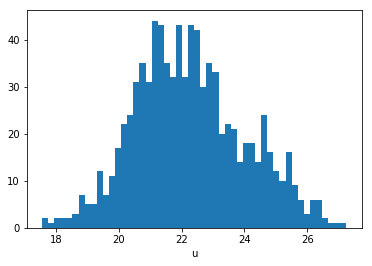

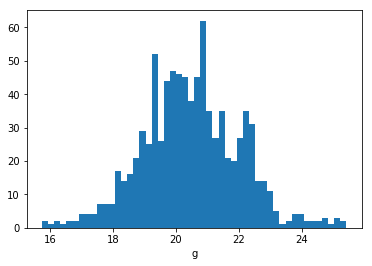

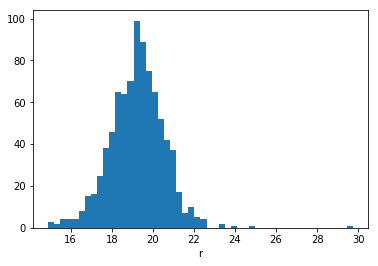

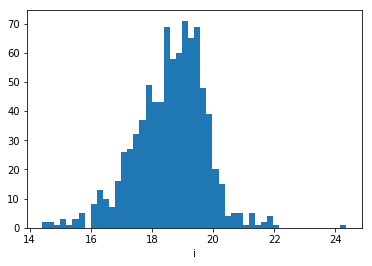

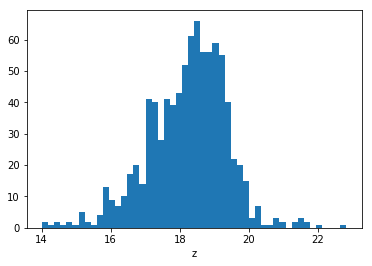

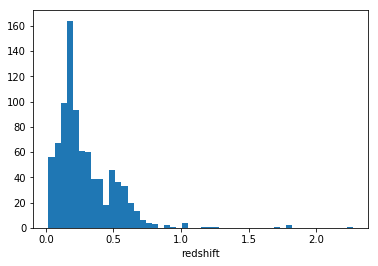

In [45]:
for name in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    plt.hist(no_outliers_df[name], bins=50)
    plt.xlabel(name)
    plt.show()

In [9]:
type(no_outliers_df['u'])

pandas.core.series.Series

In [10]:
pd.Index(no_outliers_df['u']).get_loc(25.92735)

0

Creates a new dataframe with four new columns. Each column takes the difference between adjacent columns.

In [11]:
d= {'a': no_outliers_df['g'] - no_outliers_df['r'],
    'b': no_outliers_df['r'] - no_outliers_df['i'],
    'c': no_outliers_df['i'] - no_outliers_df['z'],
    'd': no_outliers_df['u'] - no_outliers_df['g']
   }
add_columns_df = pd.DataFrame(d)
add_columns_df.head()

df = pd.concat([no_outliers_df, add_columns_df], axis = 1)

df = df[(df['r'] < 25) & (df['b'] > -1) & (df['c'] < 2) & (df['c'] > -0.5)]
df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid,a,b,c,d
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322,1.74958,0.68151,0.13412,4.93165
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368,0.65768,0.37921,0.29902,1.14409
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374,1.21367,0.55975,0.36866,1.81583
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367,0.92357,0.50392,0.40836,0.67811
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281,0.99048,1.38181,0.47651,2.95084


Creates x, a dataframe with the columns of magnitude differences and one column of magnitudes (in this case it was u, but it could be anything). Also creates y, which is the redshift column

In [12]:
y = df['redshift']
x = df.iloc[:,[3, 13, 14, 15, 16]]
x.head()

,u,a,b,c,d
0,25.92735,1.74958,0.68151,0.13412,4.93165
1,19.38905,0.65768,0.37921,0.29902,1.14409
2,21.50923,1.21367,0.55975,0.36866,1.81583
3,20.96947,0.92357,0.50392,0.40836,0.67811
4,25.27165,0.99048,1.38181,0.47651,2.95084


In [13]:
x.shape

(865, 5)

# Linear Regression

Imports the linear model and fits it to x and y.

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit (x,y)
print(reg.coef_)
print(reg.intercept_)

[ 0.00321352  0.04744764  0.37333739  0.01887991 -0.04351328]
0.0


Defines a manual linear regression function.

In [31]:
def dumb_linreg(x, coef, intercept):
    return x * coef + intercept

Defines a function which returns 50 floats between the minimum and maximum of a column

In [32]:
def x_for_plotting(column):
    out = numpy.linspace(min(x[column]), max(x[column]), 50)
    return(out)

Defines a chi square error function.

In [33]:
def chi_square_error(observed_y, predicted_y):
    error = 0
    observed_y_list = observed_y.tolist()
    predicted_y_list = predicted_y.tolist()
    for i in predicted_y_list:
        error += ((observed_y_list[predicted_y_list.index(i)] - i)**2)/numpy.var(predicted_y)**2
    print(error)

Creates x_for_plotting_list, an array of all of the 50 floats for each column of x. Also creates y_for_plotting_list, which uses the manual linear regression function to predict y values based on x_for_plotting_list.

In [34]:
x_for_plotting_list = numpy.asarray([x_for_plotting('u'), x_for_plotting('a'), x_for_plotting('b'),\
                                    x_for_plotting('c'), x_for_plotting('d')])
y_for_plotting_list = dumb_linreg(x_for_plotting_list.T, reg.coef_, reg.intercept_)

Plots scatterplots for each column of x versus y, and also plots the line predicted by dumb_linreg. The problem with this is the terrible fit of the lines, even though theoretically it should work fine. It might also have something to do with the intercepts.

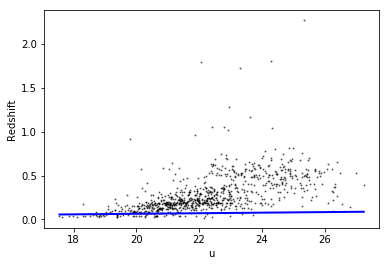

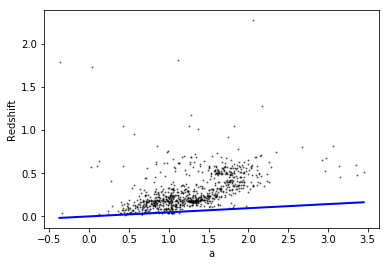

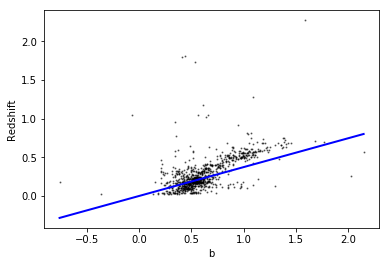

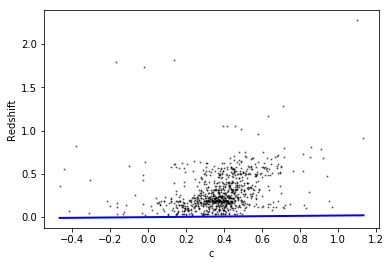

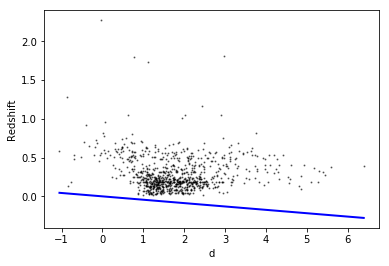

In [42]:
x_names = ['u', 'a', 'b', 'c', 'd']
for i in range(len(x_names)):
    name = x_names[i]
    plt.scatter(x[name], y, color='black',s=1, alpha=0.5)
    x_oops = x_for_plotting_list[x_names.index(name)]
    plt.plot(x_oops, dumb_linreg(x_oops, reg.coef_[i], reg.intercept_), color='blue', linewidth = 2)
    plt.xlabel(name)
    plt.ylabel("Redshift")
    plt.show()

Calculates chi square error for this linear regression. The error is very large!

In [43]:
chi_square_error(y, dumb_linreg(x_oops, reg.coef_[i], reg.intercept_))

107263.56871313594
